In [1]:
from PIL import Image, ImageOps
import os
import numpy as np
import matplotlib.pyplot as plt

# Image Preprocessing

In [2]:
# Path to image dataset folder
input_folder = 'C:/Users/ujjwol/OneDrive - Tribhuvan University/Documents/GitHub/PCA-on-Face-Dataset/Face Dataset'

# Output folder for processed images
output_folder = 'C:/Users/ujjwol/OneDrive - Tribhuvan University/Documents/GitHub/PCA-on-Face-Dataset/Processed Image'

In [3]:
# Desired size for the output images
output_size = (256, 256)

# Initialize lists to store images and vectors
image_vectors = []

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [4]:
# Loop through each image in the input folder
for filename in os.listdir(input_folder):
    image_path = os.path.join(input_folder, filename)
    
    # Open the image using Pillow
    img = Image.open(image_path)
        
    # Convert the image to grayscale
    img_gray = img.convert('L')
        
    # Enhance contrast to improve lighting uniformity
    img_enhanced = ImageOps.equalize(img_gray)
        
    # Resize the image to the desired size
    img_resized = img_gray.resize(output_size, Image.LANCZOS)
        
    # Save the processed image to the output folder
    output_path = os.path.join(output_folder, filename)
    img_resized.save(output_path)
    
    # Convert the processed image to a vector
    img_vector = np.array(img_resized).flatten()
    
    # Append the image vector to the list
    image_vectors.append(img_vector)
    
    # Create a single matrix from the list of image vectors
    data_matrix = np.vstack(image_vectors)

In [5]:
num_images = len(image_vectors)
num_images

48

# Eigenface Generation

In [6]:
#Normalize the data
data_nor = (data_matrix-data_matrix.mean())/data_matrix.std()

#Calculate covariance matrix using formula
S_dat = (1/(len(data_nor)-1))*np.dot(data_nor, data_nor.T)

In [7]:
#Eigenvalues and Eigenvector calculation
eigenvalues, eigenvector = np.linalg.eig(S_dat)

In [8]:
#Sorting of eigenvalues and eigenvector in descending order
ind = np.argsort(eigenvalues)[::-1] #Get sorting indices 
eigVal_sorted = eigenvalues[ind]    #Sort eigenvalues according to indices
eigVec_sorted = eigenvector[:, ind]

In [9]:
#Calculate proportion of variance
pro_var = (eigenvalues/np.sum(eigenvalues))

In [10]:
Y_2d = np.dot(eigVec_sorted.T,data_nor)

In [11]:
Y_2d.shape

(48, 65536)

In [12]:
data_matrix.shape

(48, 65536)

In [13]:
num_images, num_pixels = data_matrix.shape

# Face Representation

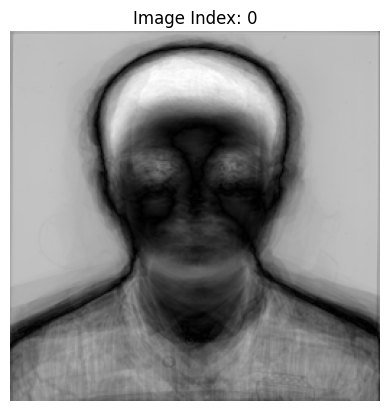

In [14]:
# Assuming Y_2d is your flattened dataset with shape (130, 16384)
num_images = Y_2d.shape[0]
image_size = 256

# Reshape each row back into a 128x128 image
images = np.abs(Y_2d.reshape(num_images, image_size, image_size))

selected_index = 0

plt.imshow(images[selected_index], cmap='gray')  # Assuming grayscale images
plt.title(f"Image Index: {selected_index}")
plt.axis('off')
plt.show()

In [15]:
# Calculate the mean face vector
mean_face = np.mean(data_nor, axis=0)

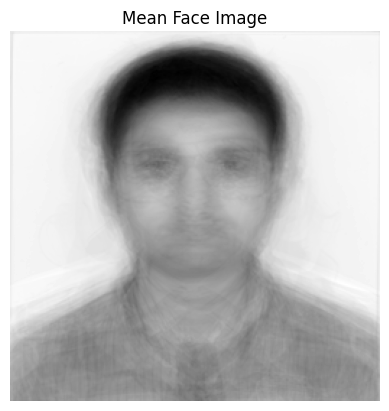

In [16]:
# Reshape the array to a 2D image format (256x256)
image_size = (256, 256)
mean_face_image = mean_face.reshape(image_size)

# Plot the image
plt.imshow(mean_face_image, cmap='gray')  # Display the image using grayscale colormap
plt.axis('off')  # Turn off axes
plt.title('Mean Face Image')
plt.show()

# Principle Components Visualization

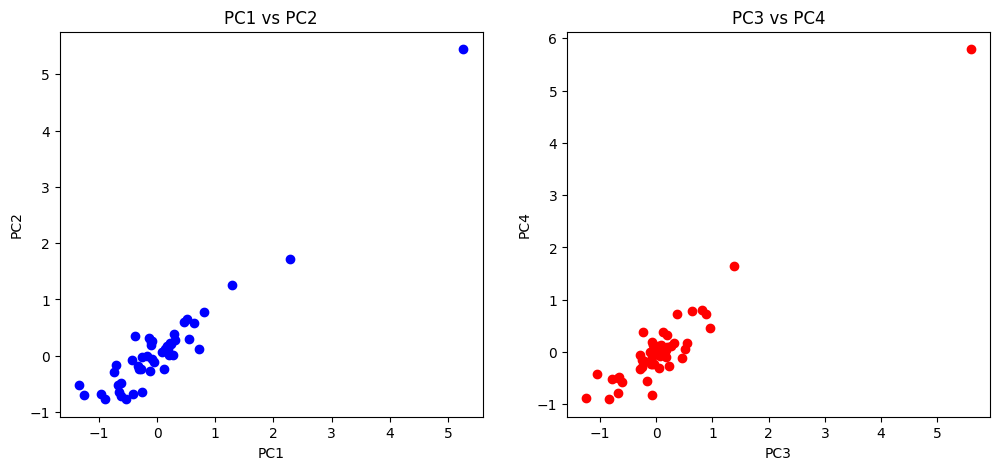

In [17]:
# Create separate plots for PC1 vs PC2 and PC3 vs PC4
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PC1 vs PC2
ax1.scatter(Y_2d[:, 0], Y_2d[:, 1], c='b', marker='o')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('PC1 vs PC2')

# Plot PC3 vs PC4
ax2.scatter(Y_2d[:, 2], Y_2d[:, 3], c='r', marker='o')
ax2.set_xlabel('PC3')
ax2.set_ylabel('PC4')
ax2.set_title('PC3 vs PC4')

#plt.tight_layout()
plt.show()

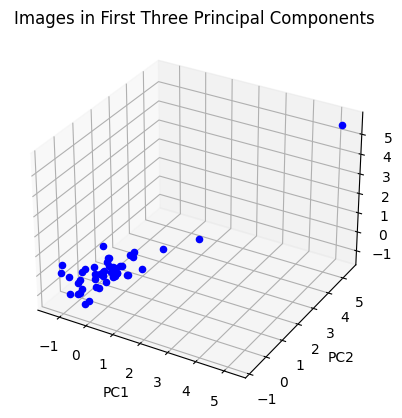

In [18]:
# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each image in the 3D space using the first three principal components
for i in range(num_images):
    pc1 = Y_2d[i, 0]
    pc2 = Y_2d[i, 1]
    pc3 = Y_2d[i, 2]
    ax.scatter(pc1, pc2, pc3, c='b', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("Images in First Three Principal Components")
plt.show()

# Image Reconstruction

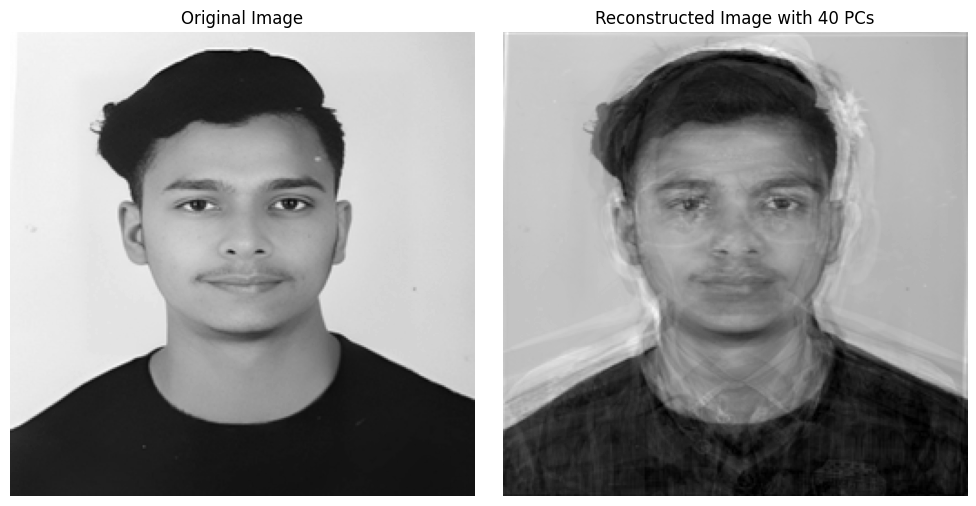

In [19]:
# Reconstruct face images using the first 'num_pcs' principal components
num_pcs = 40  # Change this to the desired number of principal components
reconstructed_images_vec = np.dot(eigVec_sorted[:, :num_pcs], Y_2d[:num_pcs, :])
reconstructed_images = np.abs((reconstructed_images_vec * data_matrix.std()) + data_matrix.mean())

#Index from 0 to 47
selected_index = 36

# Plot the original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data_matrix[selected_index].reshape(output_size), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images[selected_index].reshape(output_size), cmap='gray')
plt.title(f"Reconstructed Image with {num_pcs} PCs")
plt.axis('off')

plt.tight_layout()
plt.show()

# Using sklearn for PCA computation

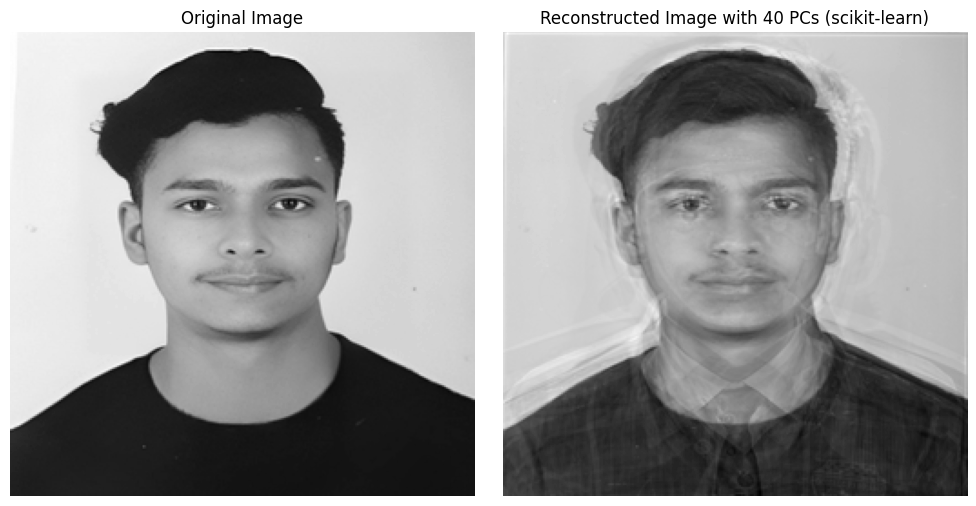

In [20]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA(n_components=num_pcs)

# Fit and transform data
Y_2d_sklearn = pca.fit_transform(data_nor)

# Inverse transform to reconstruct images
reconstructed_images_sklearn = pca.inverse_transform(Y_2d_sklearn)

# Rescale the reconstructed images
reconstructed_images_sklearn = ((reconstructed_images_sklearn * data_matrix.std()) + data_matrix.mean())

# Plot the original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(data_matrix[selected_index].reshape(output_size), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_images_sklearn[selected_index].reshape(output_size), cmap='gray')
plt.title(f"Reconstructed Image with {num_pcs} PCs (scikit-learn)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Required number of PCs

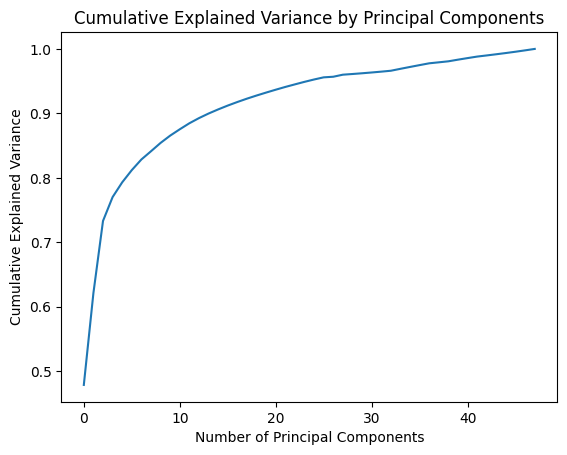

In [21]:
explained_var_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(explained_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()